<a href="https://colab.research.google.com/github/lalit-kumr/text_mining_nlp/blob/main/nlp_women_clothing_ecommerce10-sep-21-7-00-pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

from textblob import TextBlob

import seaborn as sn
%matplotlib inline

from wordcloud import WordCloud, ImageColorGenerator
# from PIL import Image


In [3]:
df = pd.read_excel('https://github.com/lalit-kumr/text_mining_nlp/blob/main/Womens%20Clothing%20Reviews%20Data.xlsx?raw=true')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


### Changing column names to lower case

In [4]:
df.columns  = ['product_id',
               'category',
               'sub_cat_1',
               'sub_cat_2',
               'location',
               'channel',
               'age',
               'review_title',
               'review_text',
               'rating',
               'recommend_flag']

### Missing value treatement

In [5]:
df.isna().sum()

product_id           0
category            14
sub_cat_1           14
sub_cat_2           14
location             0
channel              0
age                  0
review_title      3810
review_text        845
rating               0
recommend_flag       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

product_id        0
category          0
sub_cat_1         0
sub_cat_2         0
location          0
channel           0
age               0
review_title      0
review_text       0
rating            0
recommend_flag    0
dtype: int64

## EDA

### plot of count of ratings

<AxesSubplot:xlabel='rating'>

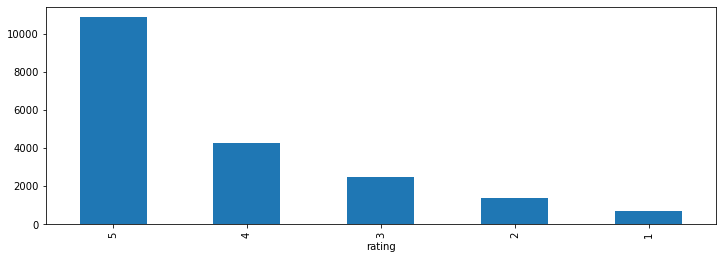

In [8]:
df.rating.value_counts().plot(kind='bar',figsize=(12,4),xlabel='rating')

<AxesSubplot:xlabel='sub_category_1'>

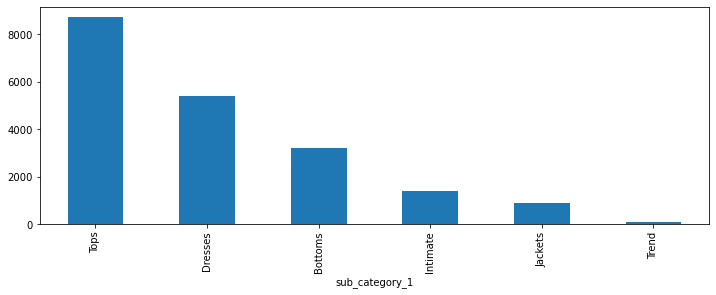

In [9]:
df.sub_cat_1.value_counts().plot(kind='bar',figsize=(12,4),xlabel='sub_category_1')

<AxesSubplot:xlabel='sub_category_2'>

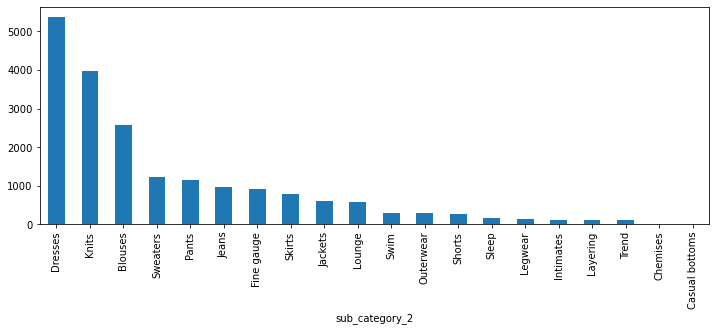

In [10]:
df.sub_cat_2.value_counts().plot(kind='bar',figsize=(12,4),xlabel='sub_category_2')

<AxesSubplot:xlabel='channel'>

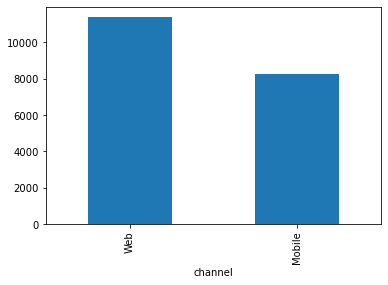

In [11]:
df.channel.value_counts().plot(kind='bar',xlabel='channel')

<AxesSubplot:xlabel='recommend_flag'>

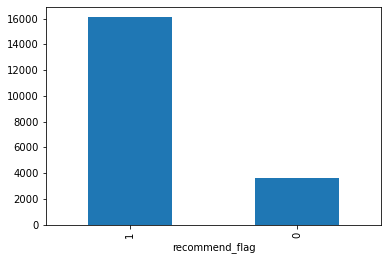

In [12]:
df.recommend_flag.value_counts().plot(kind='bar',xlabel='recommend_flag')

### plotting counts of each age group

<AxesSubplot:xlabel='age group'>

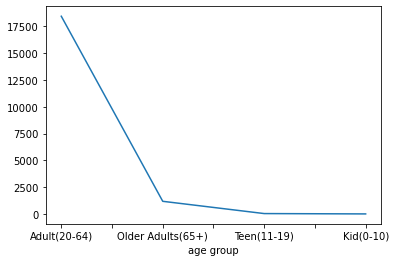

In [13]:

bins= [0,11,20,65,120]
labels = ['Kid(0-10)','Teen(11-19)','Adult(20-64)','Older Adults(65+)']
df['age_groups'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.age_groups.value_counts().plot(xlabel='age group')

<AxesSubplot:xlabel='location'>

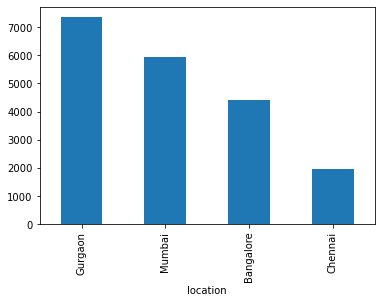

In [14]:
df.location.value_counts().plot(kind='bar',xlabel='location')

## Data cleaning

In [15]:
#changing text to lower case
df.review_text = df.review_text.apply(lambda x: x.lower())
df.review_title = df.review_title.apply(lambda x: x.lower())

#removing special characters
df.review_text = df.review_text.apply(lambda x:re.sub(r'[^\w\s]', '', x))
df.review_title = df.review_title.apply(lambda x:re.sub(r'[^\w\s]', '', x))
df.head()

,product_id,category,sub_cat_1,sub_cat_2,location,channel,age,review_title,review_text,rating,recommend_flag,age_groups
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,Adult(20-64)
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy,i love love love this jumpsuit its fun flirty ...,5,1,Adult(20-64)
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,Adult(20-64)
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,not for the very petite,i love tracy reese dresses but this one is not...,2,0,Adult(20-64)
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,Adult(20-64)


### sentiment analysis

In [16]:
df['polarity'] = df.review_text.apply(lambda x: TextBlob(x).sentiment.polarity)


def sentiment(x):
    if x > 0:
        return 'positive'
    elif x <0:
        return 'negative'
    else:
        return 'neutral'
    
    
df['sentiment'] = df.polarity.apply(lambda x: sentiment(x))

In [17]:
df.sentiment.value_counts()

positive    18437
negative     1145
neutral        80
Name: sentiment, dtype: int64

<AxesSubplot:>

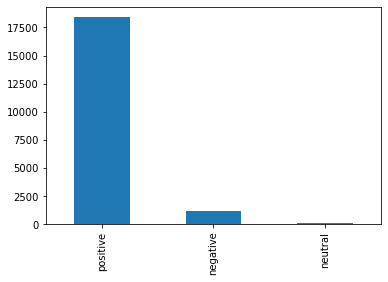

In [18]:
df.sentiment.value_counts().plot(kind='bar')

In [19]:
df[['channel','sentiment','polarity']].groupby(by=['channel','sentiment']).mean()

polarity
channel sentiment          
Mobile  negative  -0.088095
        neutral    0.000000
        positive   0.262506
Web     negative  -0.091003
        neutral    0.000000
        positive   0.258742

<AxesSubplot:xlabel='channel,sentiment'>

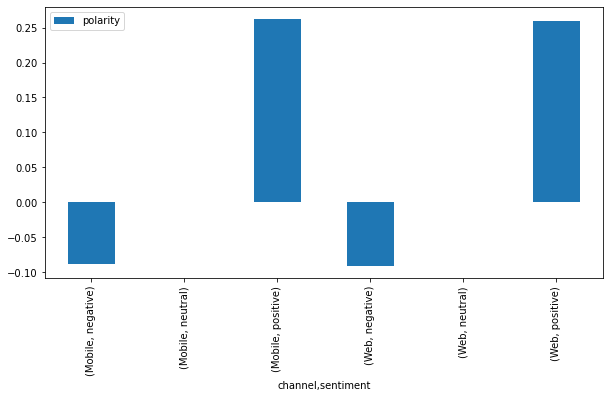

In [20]:
df[['channel','sentiment','polarity']].groupby(by=['channel','sentiment']).mean().plot(kind='bar',figsize=(10,5))

In [21]:
df[['location','sentiment','polarity']].groupby(by=['location','sentiment']).mean()

polarity
location  sentiment          
Bangalore negative  -0.082914
          neutral    0.000000
          positive   0.255960
Chennai   negative  -0.100234
          neutral    0.000000
          positive   0.256601
Gurgaon   negative  -0.088341
          neutral    0.000000
          positive   0.264077
Mumbai    negative  -0.093201
          neutral    0.000000
          positive   0.260166

<AxesSubplot:xlabel='location,sentiment'>

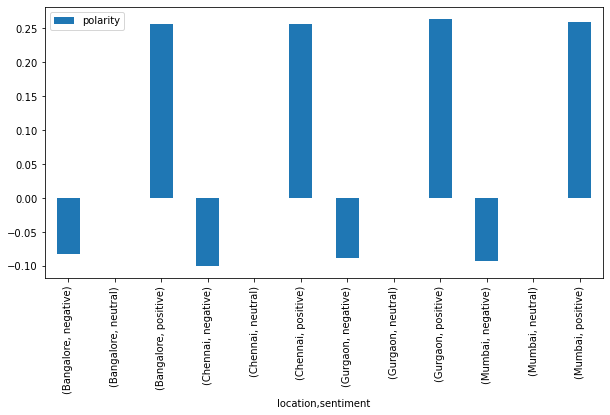

In [22]:
df[['location','sentiment','polarity']].groupby(by=['location','sentiment']).mean().plot(kind='bar',figsize=(10,5))

In [23]:
df[['category','sentiment','polarity']].groupby(by=['category','sentiment']).mean()

polarity
category       sentiment          
General        negative  -0.091736
               neutral    0.000000
               positive   0.258646
General Petite negative  -0.088210
               neutral    0.000000
               positive   0.261747
Initmates      negative  -0.080386
               neutral    0.000000
               positive   0.268594

<AxesSubplot:xlabel='category,sentiment'>

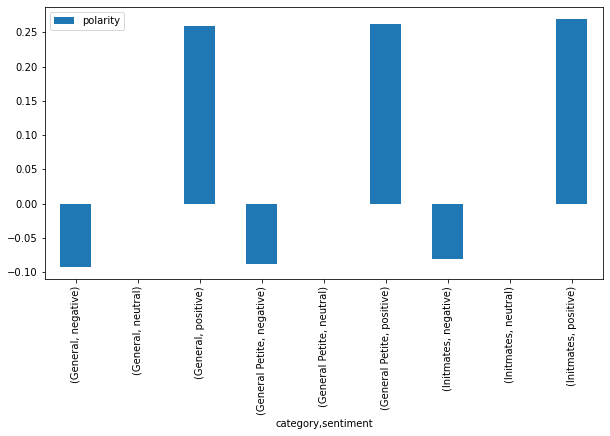

In [24]:
df[['category','sentiment','polarity']].groupby(by=['category','sentiment']).mean().plot(kind='bar',figsize=(10,5))

In [25]:
df[['sub_cat_1','sentiment','polarity']].groupby(by=['sub_cat_1','sentiment']).mean()

polarity
sub_cat_1 sentiment          
Bottoms   negative  -0.089757
          neutral    0.000000
          positive   0.262813
Dresses   negative  -0.086299
          neutral    0.000000
          positive   0.258758
Intimate  negative  -0.081034
          neutral    0.000000
          positive   0.267061
Jackets   negative  -0.080952
          neutral    0.000000
          positive   0.251328
Tops      negative  -0.094682
          neutral    0.000000
          positive   0.260418
Trend     negative  -0.093631
          positive   0.243750

<AxesSubplot:xlabel='sub_cat_1,sentiment'>

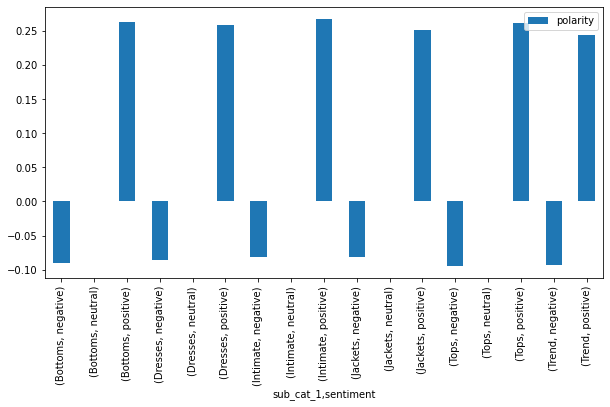

In [26]:
df[['sub_cat_1','sentiment','polarity']].groupby(by=['sub_cat_1','sentiment']).mean().plot(kind='bar',figsize=(10,5))

In [27]:
df[['sub_cat_2','sentiment','polarity']].groupby(by=['sub_cat_2','sentiment']).mean()

polarity
sub_cat_2      sentiment          
Blouses        negative  -0.079092
               neutral    0.000000
               positive   0.262620
Casual bottoms positive   0.330000
Chemises       positive   0.600000
Dresses        negative  -0.086299
               neutral    0.000000
               positive   0.258758
Fine gauge     negative  -0.105789
               neutral    0.000000
               positive   0.255419
Intimates      negative  -0.133985
               positive   0.279412
Jackets        negative  -0.098751
               neutral    0.000000
               positive   0.256900
Jeans          negative  -0.099090
               neutral    0.000000
               positive   0.261219
Knits          negative  -0.096995
               neutral    0.000000
               positive   0.261998
Layering       negative  -0.043695
               neutral    0.000000
               positive   0.279834
Legwear        negative  -0.043405
               neutral    0.000000
               positive   0.264149
Lounge         negative  -0.080382
               neutral    0.000000
               positive   0.260254
Outerwear      negative  -0.051583
               neutral    0.000000
               positive   0.239304
Pants          negative  -0.085012
               neutral    0.000000
               positive   0.263726
Shorts         negative  -0.088921
               neutral    0.000000
               positive   0.258641
Skirts         negative  -0.089247
               neutral    0.000000
               positive   0.264735
Sleep          negative  -0.105724
               neutral    0.000000
               positive   0.266127
Sweaters       negative  -0.105868
               neutral    0.000000
               positive   0.254346
Swim           negative  -0.088129
               neutral    0.000000
               positive   0.270938
Trend          negative  -0.093631
               positive   0.243750

<AxesSubplot:xlabel='sub_cat_2,sentiment'>

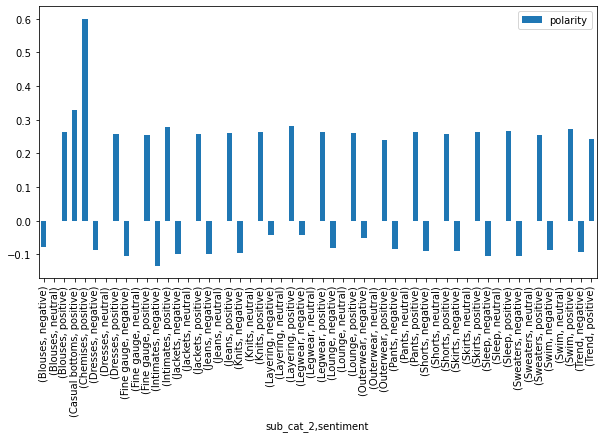

In [28]:
df[['sub_cat_2','sentiment','polarity']].groupby(by=['sub_cat_2','sentiment']).mean().plot(kind='bar',figsize=(10,5))

<AxesSubplot:>

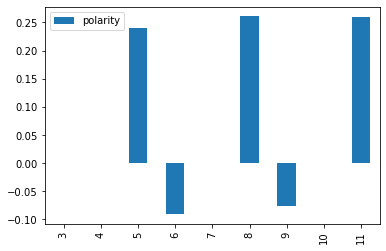

In [29]:
df_age_sentiment = df[['age_groups','sentiment','polarity']].groupby(by=['age_groups','sentiment'],as_index=False).mean()
df_age_sentiment = df_age_sentiment.drop(labels=[0,1,2],axis=0)
df_age_sentiment.plot(kind='bar')

<AxesSubplot:xlabel='age_groups,sentiment'>

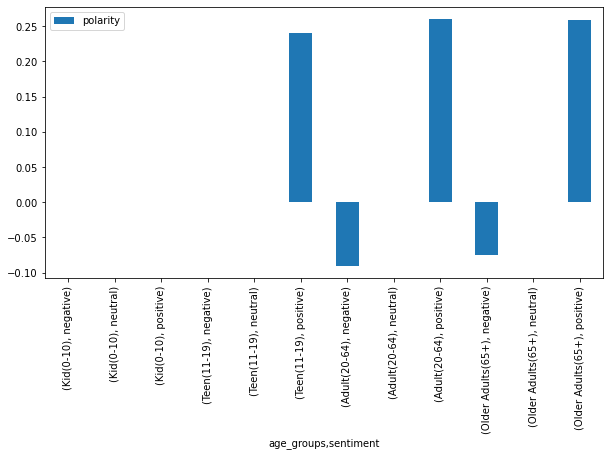

In [30]:
df[['age_groups','sentiment','polarity']].groupby(by=['age_groups','sentiment']).mean().plot(kind='bar',figsize=(10,5))

### Frequency plots and word clouds for review_text

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(df.review_text)
X_train_counts.shape

(19662, 18053)

In [33]:
df_term_matrix = X_train_counts.toarray()
df_term_matrix = pd.DataFrame(df_term_matrix)
df_term_matrix.columns=count_vect.get_feature_names()
df_term_matrix

,00,000,002first,00p,00p0p,00p0rxxsxs,02,025,02xs,03,...,zipping,zips,zombie,zone,zoolanders,zoom,zooming,zuma,ãâ,ãâ¼ber
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

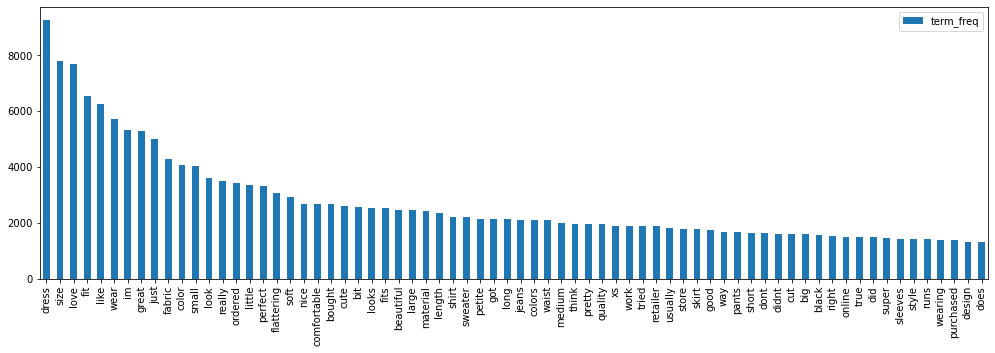

In [72]:
df_term_freq = pd.DataFrame(df_term_matrix.apply(sum), columns=['term_freq'])
df_term_freq.sort_values('term_freq', ascending=False, inplace=True)
df_term_freq.head(70).plot(kind='bar', figsize=(17,5))

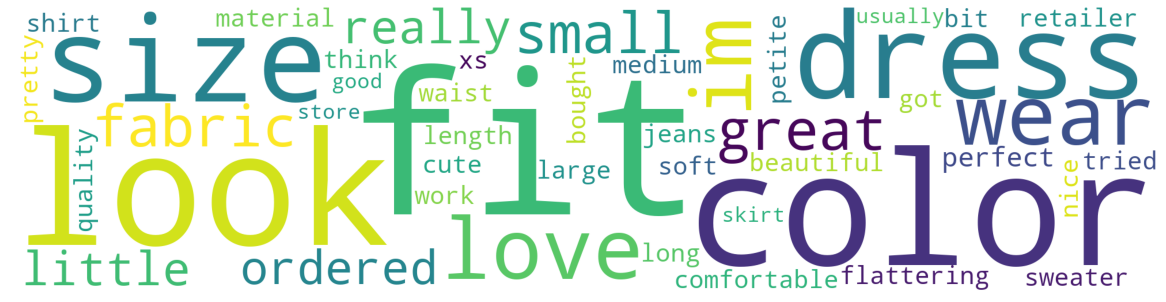

In [68]:
word_list  = df_term_freq.head(50).index


# Generate the word cloud from frequencies
wc = WordCloud(background_color='white',width=2000,height=500).generate(' '.join(word_list))
plt.figure(figsize = (16, 4), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### wordcloud for review title

In [71]:
count_vect = CountVectorizer(stop_words='english')
X_title_counts = count_vect.fit_transform(df.review_title)
X_title_counts.shape
df_title_matrix = X_title_counts.toarray()
df_title_matrix = pd.DataFrame(df_title_matrix)
df_title_matrix.columns=count_vect.get_feature_names()
df_title_matrix

,00,00p,10,100,12,1214,150,16,16s,1950s,...,yup,zip,zipper,zippered,zippers,zipperyday,zipperydodah,zipup,zoe,zowie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

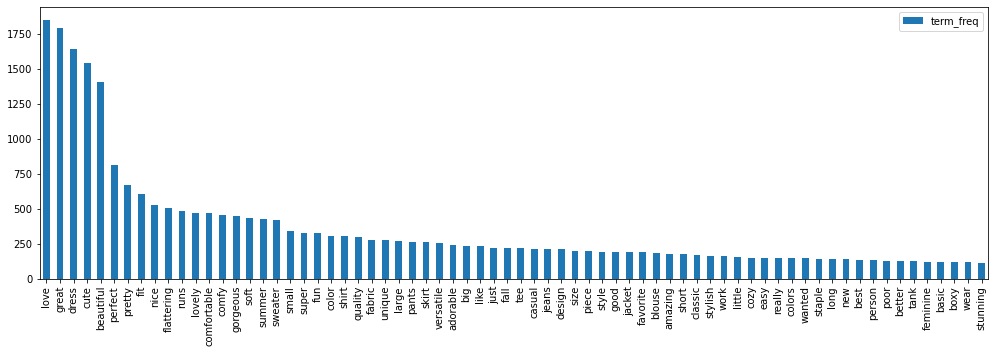

In [75]:
df_title_freq = pd.DataFrame(df_title_matrix.apply(sum), columns=['term_freq'])
df_title_freq.sort_values('term_freq', ascending=False, inplace=True)
df_title_freq.head(70).plot(kind='bar', figsize=(17,5))

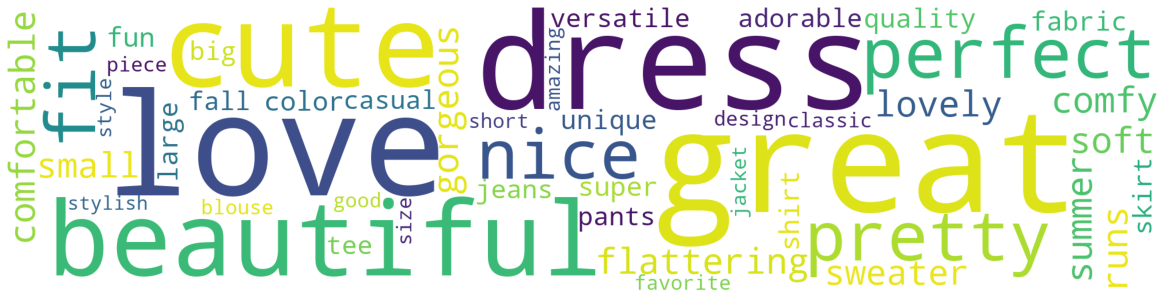

In [76]:
word_list  = df_title_freq.head(50).index


# Generate the word cloud from frequencies
wc = WordCloud(background_color='white',width=2000,height=500).generate(' '.join(word_list))
plt.figure(figsize = (16, 4), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### topic modelling

In [78]:
df

,product_id,category,sub_cat_1,sub_cat_2,location,channel,age,review_title,review_text,rating,recommend_flag,age_groups,polarity,sentiment
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,Adult(20-64),0.076392,positive
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy,i love love love this jumpsuit its fun flirty ...,5,1,Adult(20-64),0.500000,positive
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,Adult(20-64),0.393750,positive
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,not for the very petite,i love tracy reese dresses but this one is not...,2,0,Adult(20-64),0.178750,positive
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,Adult(20-64),0.060500,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,great dress for many occasions,i was very happy to snag this dress at such a ...,5,1,Adult(20-64),0.512667,positive
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,wish it was made of cotton,it reminds me of maternity clothes soft stretc...,3,1,Adult(20-64),0.091667,positive
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,cute but see through,this fit well but the top was very see through...,3,0,Adult(20-64),0.414286,positive
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,very cute dress perfect for summer parties and we,i bought this dress for a wedding i have this ...,3,1,Adult(20-64),0.316667,positive


In [80]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(df.review_text,df.rating,random_state = 111, test_size = 0.3)

In [84]:
print('x_train :',x_train.shape)
print('x_test  :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test  :',y_test.shape)

x_train : (13763,)
x_test  : (5899,)
y_train : (13763,)
y_test  : (5899,)


In [90]:
#Feature generation using TDM
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer


tdm_matrix = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,1))

tdm_x_train = tdm_matrix.fit_transform(x_train)
tdm_x_test  = tdm_matrix.transform(x_test)

In [92]:
print('No.of features :',len(tdm_matrix.get_feature_names()))

No.of features : 14936


In [93]:
from sklearn.decomposition import LatentDirichletAllocation


#training an lda model
lda_model = LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=50)
x_topics = lda_model.fit_transform(tdm_x_train)
topic_word = lda_model.components_ 
vocab = tdm_matrix.get_feature_names()

In [96]:
# view the topic models
top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print(topic_words)



['funky' 'soooo' 'worst' 'byron' 'meadow' 'rue' 'tracy' 'reese'
 'outstanding' 'narrower']
['adn' 'bone' 'hte' '23' 'knotted' 'buttoning' 'basket' 'advantage'
 'falttering' 'gently']
['wearability' 'xtra' 'pan' 'peter' 'sophisticatedi' 'tranquil'
 'ginormous' 'resist' 'implies' 'limited']
['flounce' 'met' 'stretchiness' 'judge' 'twill' 'ombraa' 'circle'
 'laundry' 'lesson' 'scratchiness']
['placket' 'rating' 'sticks' 'frustrating' 'carried' 'base' 'location'
 'cutting' 'undertones' 'scheme']
['minutes' 'baggier' 'effort' 'instant' 'tags' 'mediumlarge' '32a'
 'frequently' 'rain' 'toe']
['confident' 'lingerie' 'began' 'warning' 'graphic' 'fade' 'poppy'
 'smidge' 'prettiest' 'farm']
['rib' 'ultimately' '383040' 'cage' 'rompers' 'autumn' 'older' 'armpit'
 'shop' 'brought']
['ruching' 'ahead' 'threw' 'hoodie' 'vacations' 'defines' 'maintaining'
 'complained' 'enter' 'opera']
['makeup' 'houston' 'greenblue' 'xs0' 'smallchested' 'gauge' 'motion'
 'bled' 'admiring' 'labeled']
['130lbs' 'expect

In [97]:
# view the topic models
top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
topic_summaries

['funky soooo worst byron meadow rue tracy reese outstanding narrower',
 'adn bone hte 23 knotted buttoning basket advantage falttering gently',
 'wearability xtra pan peter sophisticatedi tranquil ginormous resist implies limited',
 'flounce met stretchiness judge twill ombraa circle laundry lesson scratchiness',
 'placket rating sticks frustrating carried base location cutting undertones scheme',
 'minutes baggier effort instant tags mediumlarge 32a frequently rain toe',
 'confident lingerie began warning graphic fade poppy smidge prettiest farm',
 'rib ultimately 383040 cage rompers autumn older armpit shop brought',
 'ruching ahead threw hoodie vacations defines maintaining complained enter opera',
 'makeup houston greenblue xs0 smallchested gauge motion bled admiring labeled',
 '130lbs expectations ordinary usa oversize exceeded anytime antho slinky 50s',
 'lavender reversible rock essential north moto 103 thrown enjoyed beadwork',
 'purchases retro 70s sister vests eyecatching le

### building naive bayes model on TDM


In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# building naive bayes model on TDM
naive_model = MultinomialNB()
naive_model.fit(tdm_x_train,y_train)

predicted_train = naive_model.predict(tdm_x_train)
predicted_test = naive_model.predict(tdm_x_test)




print('Accuracy on train: ',metrics.accuracy_score(y_train,predicted_train))
print('Accuracy on test: ',metrics.accuracy_score(y_test,predicted_test))



Accuracy on train:  0.5591077526702027
Accuracy on test:  0.5534836412951347


In [103]:
# # predict probabilities on train and test
# predict_proba_train = naive_model.predict_proba(tdm_x_train)[:,1]
# predict_proba_test = naive_model.predict_proba(tdm_x_test)[:,1]

# print('ROC_AUC score on train: ',metrics.roc_auc_score(y_train,predict_proba_train))
# print('ROC_AUC score on test: ',metrics.roc_auc_score(y_test,predict_proba_test))

### Predicting star ratings using reviews by Creating the Tf-Idf model

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

In [114]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer



vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8)
x = vectorizer.fit_transform(df.review_text).toarray()

In [115]:
x.shape

(19662, 164)

In [117]:
#splitting in train and test

train_x,test_x,train_y,test_y=train_test_split(x,df.rating,test_size=0.3,random_state=111)

In [119]:
#training an logistic regressino model
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression(max_iter=1000)
log_regression.fit( train_x, train_y )



LogisticRegression(max_iter=1000)

In [120]:
#Evelution of train and test accuracy
test_accuracy=metrics.accuracy_score(test_y,log_regression.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,log_regression.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.6089167655534836
train_accuracy:  0.615708784422001


D:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 5] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 15.0, 'Predicted label')

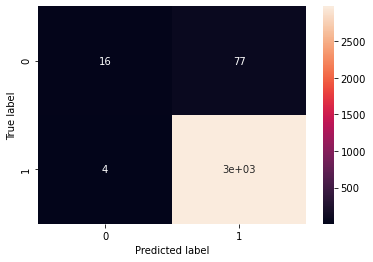

In [124]:
cm = metrics.confusion_matrix(test_y,log_regression.predict(test_x), [1,5] )
cm


sn.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')